In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
%matplotlib inline

In [2]:
data_path = "../ml_project/data/raw/heart_cleveland_upload.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,2.158249,0.964859,0.0,2.0,2.0,3.0,3.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [5]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [11]:
# target distribution
data.condition.value_counts().to_frame()

,condition
0,160
1,137


In [7]:
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

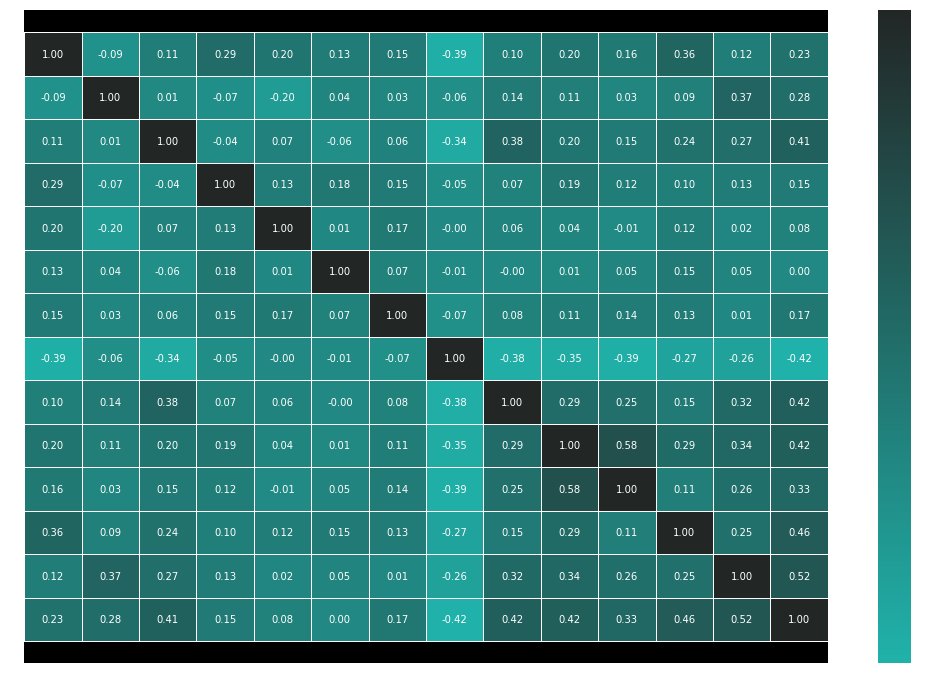

In [8]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(18, 12))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f", cmap=sns.dark_palette("#20B2AA", reverse=True, as_cmap=True));
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

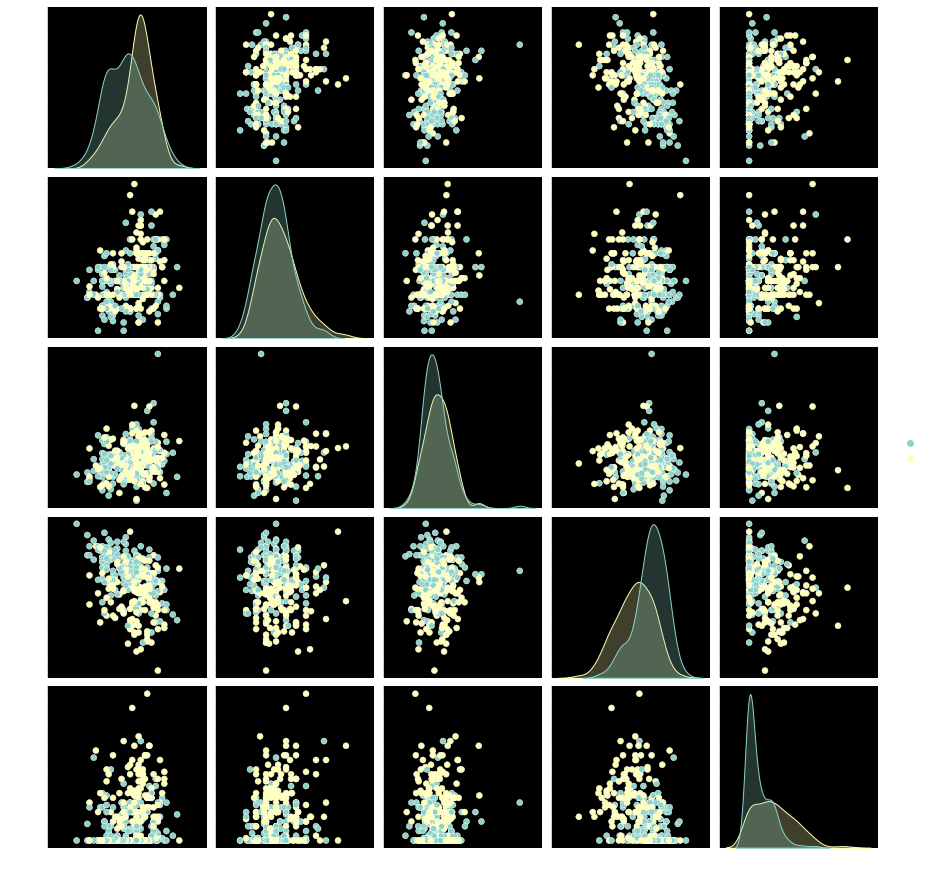

In [9]:
sns.pairplot(data[num_features + ["condition"]], hue="condition", height=2.5)

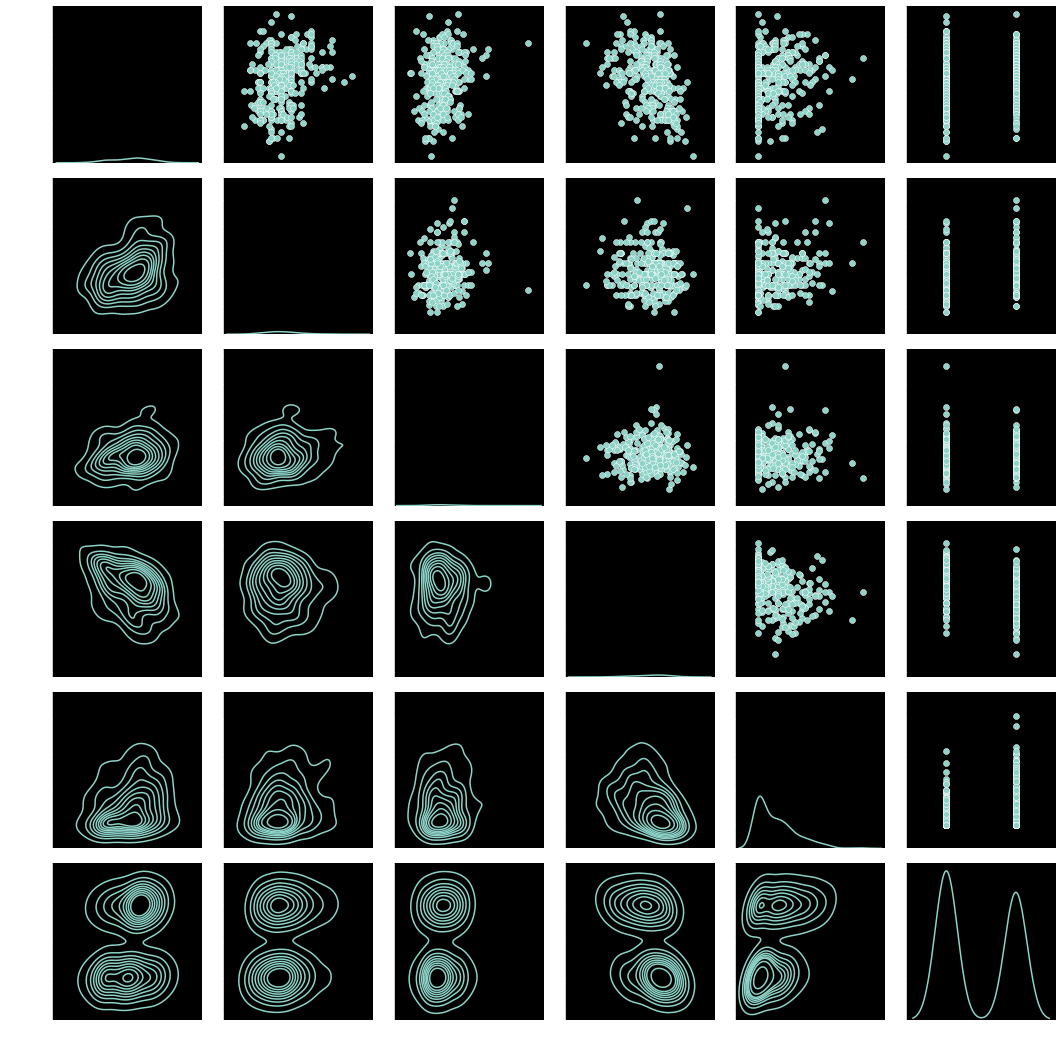

In [10]:
g = sns.PairGrid(data[num_features + ["condition"]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, legend=True)

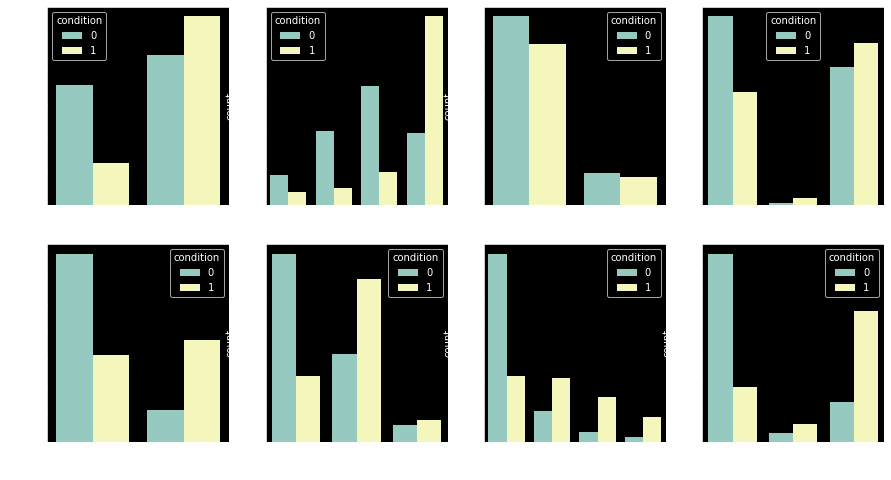

In [11]:
fig,axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(len(cat_features)):
    sns.countplot(data=data, x=cat_features[i], ax=axes[i], hue="condition")

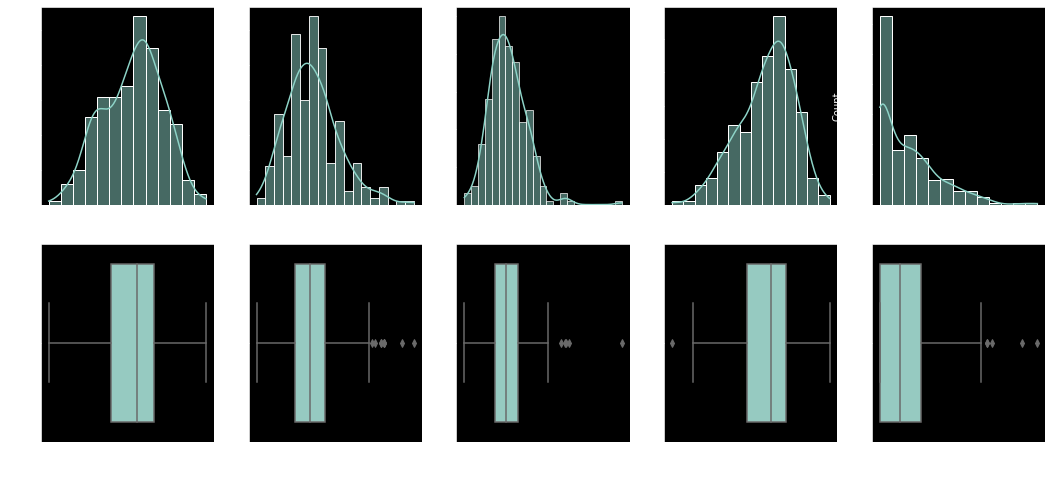

In [26]:
fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.histplot(data[num_features[i]], ax=axes[i], kde=True)
    sns.boxplot(ax=axes[i + 5], x=data[feature])

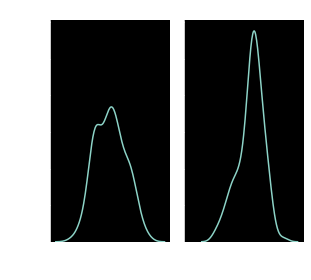

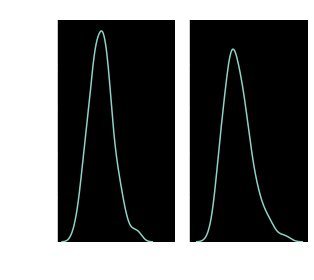

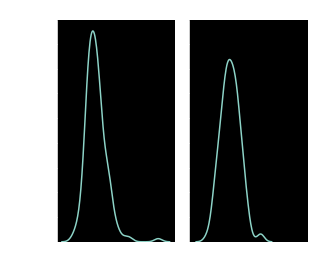

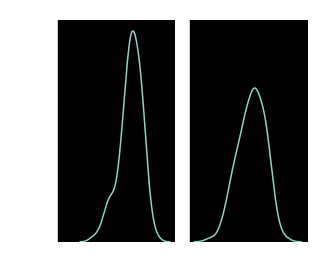

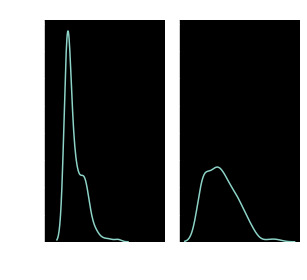

In [14]:
for i in range(5):
    g = sns.FacetGrid(data[num_features + ["condition"]], col="condition", height=4, aspect=.5, col_wrap=5)
    g.map(sns.kdeplot, num_features[i])